# File Setup

The purpose of this notebook is to visualise the Tarawa data from Antonio to see if there are specific events that should be modeled with a BN through time.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from datetime import datetime
import rpy2
import os
os.environ['R_HOME'] = '/lib/R'
%load_ext rpy2.ipython

from preprocessing_all_points import *
from preprocessing_points_spatially_temporally import *
from compile_model_t import *

# Load the data

In [3]:
# Import and preprocess data
df_lagoon_profiles,df_ocean_profiles,inundation_dict,winds_dict,waves_dict,tide_dict,sla_dict,time_dict = \
    loading_tarawa_data()

In [4]:
df_ocean,df_lagoon = preprocessing_points_spatially()
df_lagoon,lagoon_data_dict = BN_Antonio_preprocessing_lagoon(df_lagoon)
df_ocean,ocean_data_dict = BN_Antonio_preprocessing_ocean(df_ocean)

In [5]:
df_lagoon

,TWL,Tide,MSL,wind_u,wind_v,time,Hs_offshore,Tm_offshore,Dir_offshore,long,lat,TWL_less_Tide
0,0.348800,0.294470,0.052863,-7.288483,-0.209793,737056.416667,0.752295,2.409745,80.635712,172.92263,1.358684,-0.054330
1,0.286733,0.237409,0.049009,-6.039413,4.441910,728979.541667,0.670175,2.254194,158.637115,172.92263,1.358684,-0.049323
2,0.636345,0.549435,0.070888,1.720566,-3.061905,732053.583333,0.701335,6.995187,251.770996,172.92263,1.358684,-0.086911
3,-0.023494,-0.103238,0.061610,0.886826,-2.134521,731429.250000,0.868341,7.359194,260.327118,172.92263,1.358684,-0.079743
4,0.271041,0.405498,-0.139817,-6.150665,-4.782440,729770.833333,1.123267,2.866564,336.963440,172.92263,1.358684,0.134456
...,...,...,...,...,...,...,...,...,...,...,...,...
150911,0.345097,-0.202660,0.129309,-0.190445,0.684280,731403.958333,0.294968,2.585251,260.568481,172.97082,1.568399,-0.547757
150912,0.538943,0.014884,0.126154,-1.857620,3.230637,732266.666667,0.183476,1.050157,196.061508,172.97082,1.568399,-0.524059
150913,0.850492,0.339971,0.088381,7.101654,0.934555,729453.583333,0.642561,2.210803,264.560059,172.97082,1.568399,-0.510521
150914,-0.127917,-0.542793,-0.107141,-2.884735,0.078476,729990.916667,0.178335,1.354960,263.336304,172.97082,1.568399,-0.414877


# Looking for Patterns in Wind data

In [6]:
from sklearn.cluster import KMeans

In [7]:
# Clusting data based on the wind u and v speed vectors
df_winds = pd.DataFrame.from_dict({**winds_dict},orient='index').T
test = df_winds.to_numpy()
km = KMeans(n_clusters=4).fit(test)

Colour indicates clusters based on wind_u and wind_v


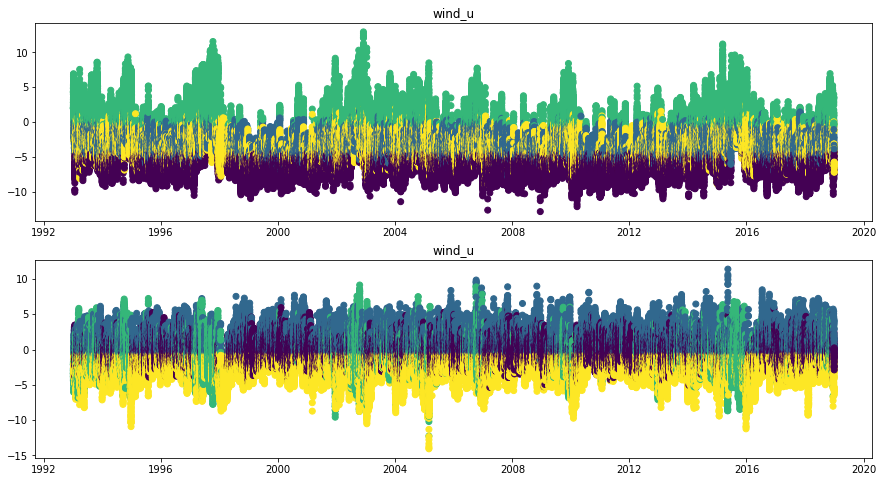

In [8]:
fig = plt.figure(figsize=(15,8))

ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

ax1.scatter(time_dict['time'],df_winds['wind_u'],c=km.labels_)
ax2.scatter(time_dict['time'],df_winds['wind_v'],c=km.labels_)

ax1.set_title('wind_u')
ax2.set_title('wind_u')

print('Colour indicates clusters based on wind_u and wind_v')

plt.show()

/tmp/ipykernel_301/3688171151.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ocean_wind_wave[col] = (max_col-df_ocean_wind_wave[col])/(max_col-min_col)
/tmp/ipykernel_301/3688171151.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ocean_wind_wave['clusters'] = km.labels_
/tmp/ipykernel_301/3688171151.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

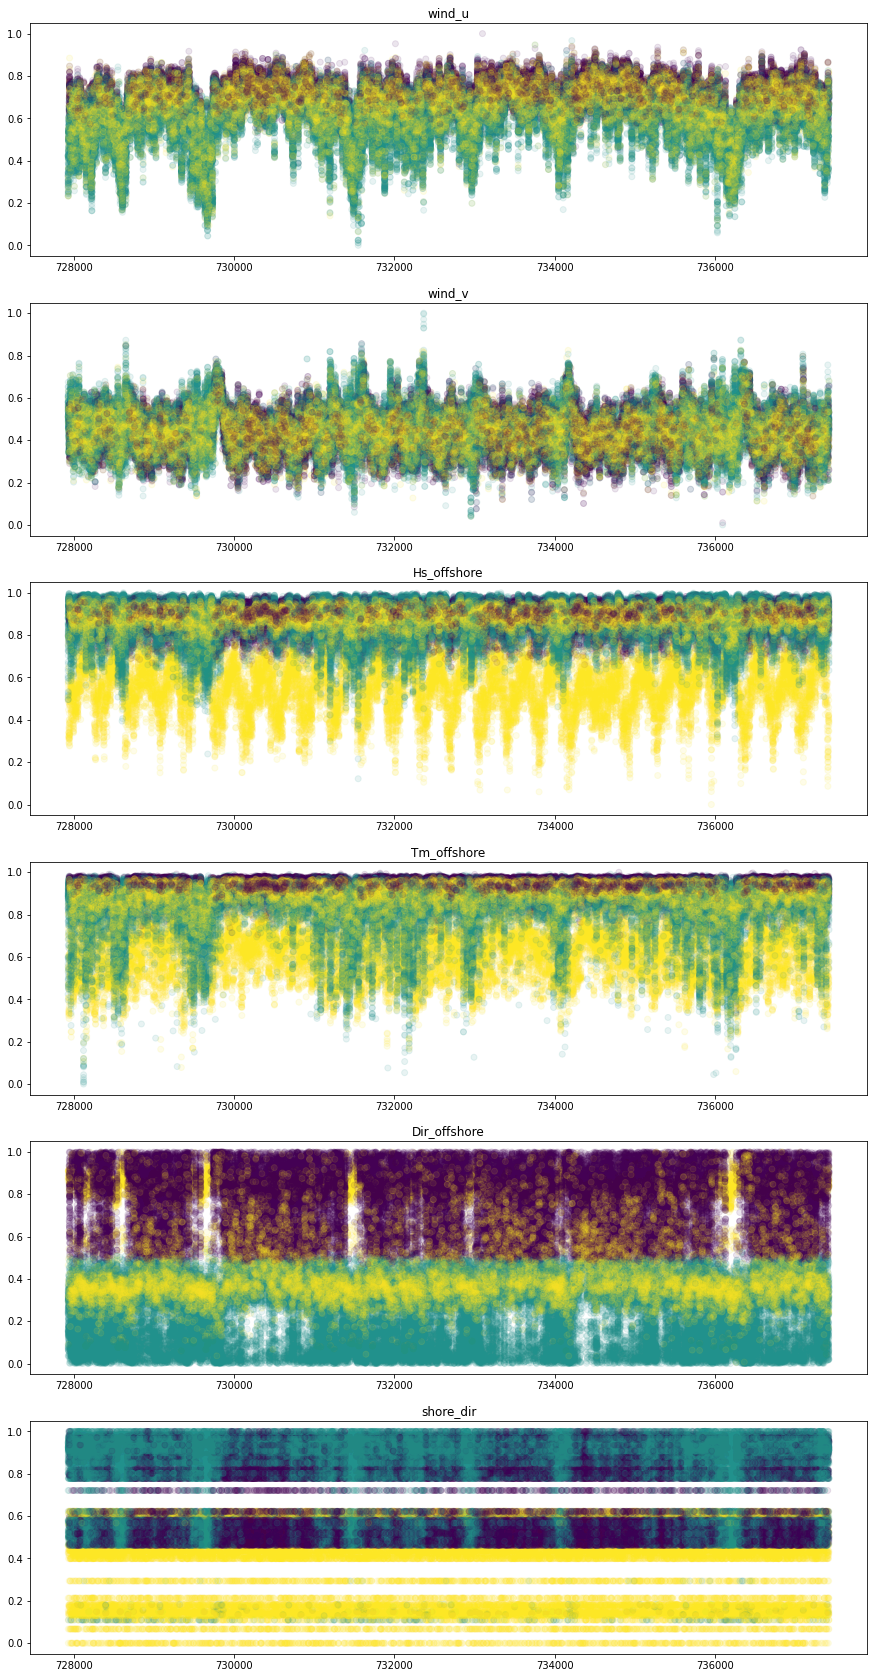

In [9]:
# Have a look at the different variables, with color indicating the clusters

df_ocean_wind_wave = df_ocean[['wind_u','wind_v','Hs_offshore','Tm_offshore','Dir_offshore','shore_dir']]

for col in list(df_ocean_wind_wave):
    max_col = np.max(df_ocean_wind_wave[col])
    min_col = np.min(df_ocean_wind_wave[col])
    df_ocean_wind_wave[col] = (max_col-df_ocean_wind_wave[col])/(max_col-min_col)

test = df_ocean_wind_wave.to_numpy()
km = KMeans(n_clusters=3).fit(test)

fig = plt.figure(figsize=(15,30))

ax1 = plt.subplot2grid((6,1),(0,0))
ax2 = plt.subplot2grid((6,1),(1,0))
ax3 = plt.subplot2grid((6,1),(2,0))
ax4 = plt.subplot2grid((6,1),(3,0))
ax5 = plt.subplot2grid((6,1),(4,0))
ax6 = plt.subplot2grid((6,1),(5,0))

for ax,var in zip([ax1,ax2,ax3,ax4,ax5,ax6],list(df_ocean_wind_wave)):
    ax.scatter(df_ocean.time,df_ocean_wind_wave[var],c=km.labels_,alpha=0.1)
    ax.set_title(var)
    
df_ocean_wind_wave['clusters'] = km.labels_
df_ocean_wind_wave['time'] = df_ocean.time
df_ocean_wind_wave['time'] = [(datetime.fromordinal(int(time)-366)+timedelta(days=time%1)) for time in df_ocean['time']]
df_ocean_wind_wave = df_ocean_wind_wave.sort_values('time')

In [10]:
df_day = df_ocean_wind_wave[(df_ocean_wind_wave.time>=datetime(1993,1,1,0,0,0))&(df_ocean_wind_wave.time<datetime(1993,1,2,0,0,0))]

In [11]:
# for index,group in df_day.groupby('clusters'):
#     !R -i df_day
#     !R summary(df_day)


In [12]:
# %%R -i df_ocean_wind_wave

# summary(df_ocean_wind_wave)

# Find "King tide" events

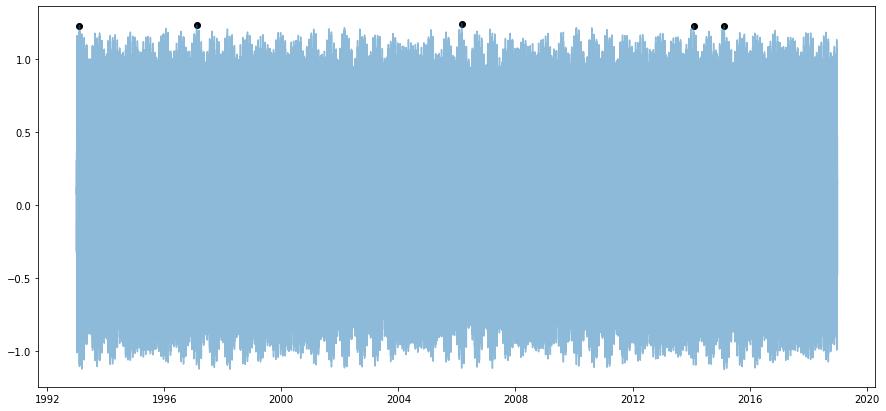

In [13]:
fig = plt.figure(figsize=(15,7))

ax1 = plt.subplot2grid((1,1),(0,0))

ax1.plot(time_dict['time'],tide_dict['Tide'],alpha=0.5)

ax1.scatter(np.array(time_dict['time'])[tide_dict['Tide']>1.22],tide_dict['Tide'][tide_dict['Tide']>1.22],c='k')

plt.show()

In [14]:
df_king_tides = pd.DataFrame.from_dict({'time':np.array(time_dict['time'])[tide_dict['Tide']>1.22],
                        'tide':np.array(tide_dict['Tide'])[tide_dict['Tide']>1.22]},orient='index').T

print("Time of 'king' tides")
df_king_tides

Time of 'king' tides


,time,tide
0,1993-02-07 05:00:00.000003,1.226567
1,1997-02-08 05:00:00.000003,1.230636
2,2006-02-28 05:00:00.000003,1.241785
3,2014-01-31 05:00:00.000003,1.226616
4,2015-02-19 05:00:00.000003,1.227578


# Large Wave Periods/Cyclones

## Shoreline Direction

In [15]:
# First, group the shorelines into faceing different directions

In [16]:
longs = [x[0] for x in inundation_dict['Ptos']]
lats = [x[1] for x in inundation_dict['Ptos']]


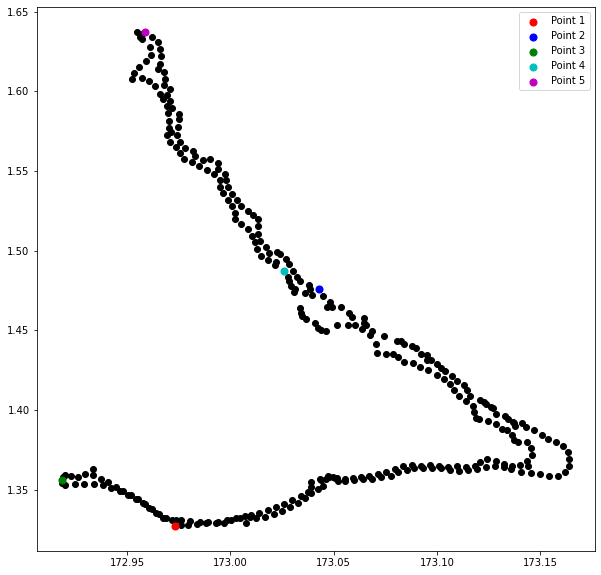

In [17]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((1,1),(0,0))

ax1.scatter(longs,lats,c='k')

p1 = ax1.scatter(longs[161],lats[161],c='r',s=50,zorder=10)
p2 = ax1.scatter(longs[299],lats[299],c='b',s=50,zorder=10)
p3 = ax1.scatter(longs[146],lats[146],c='g',s=50,zorder=10)
p4 = ax1.scatter(longs[110],lats[110],c='c',s=50,zorder=10)
p5 = ax1.scatter(longs[247],lats[247],c='m',s=50,zorder=10)


plt.legend([p1,p2,p3,p4,p5],['Point 1','Point 2','Point 3','Point 4','Point 5'])

plt.show()


In [18]:
df_ocean_coords = df_ocean[['lat','long','shore_dir']]
df_ocean_coords = df_ocean_coords.drop_duplicates()

df_ocean_coords

,lat,long,shore_dir
0,1.359241,172.92001,319.061643
1000,1.356421,172.91848,272.206588
2000,1.353139,172.92019,188.726378
3000,1.353647,172.92488,181.362270
4000,1.353986,172.92935,177.157178
...,...,...,...
170899,1.357814,172.91907,298.809736
171899,1.354158,172.91862,246.268673
172899,1.636152,172.95727,340.506556
173899,1.356990,173.04626,158.526428


For an example point, have a look at how the wave height, period and direction have changed, and see if these correlate to events

## Visualise wave height and wave period for specific location

In [19]:

wave_period_pt1 = waves_dict['Tmo'][:,161]
wave_height_pt1 = waves_dict['Hso'][:,161]
wave_time_pt1 = np.array(waves_dict['Timeo'])

wave_period_pt2 = waves_dict['Tmo'][:,299]
wave_height_pt2 = waves_dict['Hso'][:,299]
wave_time_pt2 = np.array(waves_dict['Timeo'])

wave_period_pt3 = waves_dict['Tmo'][:,146]
wave_height_pt3 = waves_dict['Hso'][:,146]
wave_time_pt3 = np.array(waves_dict['Timeo'])

wave_period_pt4 = waves_dict['Tmo'][:,110]
wave_height_pt4 = waves_dict['Hso'][:,110]
wave_time_pt4 = np.array(waves_dict['Timeo'])

wave_period_pt5 = waves_dict['Tmo'][:,247]
wave_height_pt5 = waves_dict['Hso'][:,247]
wave_time_pt5 = np.array(waves_dict['Timeo'])


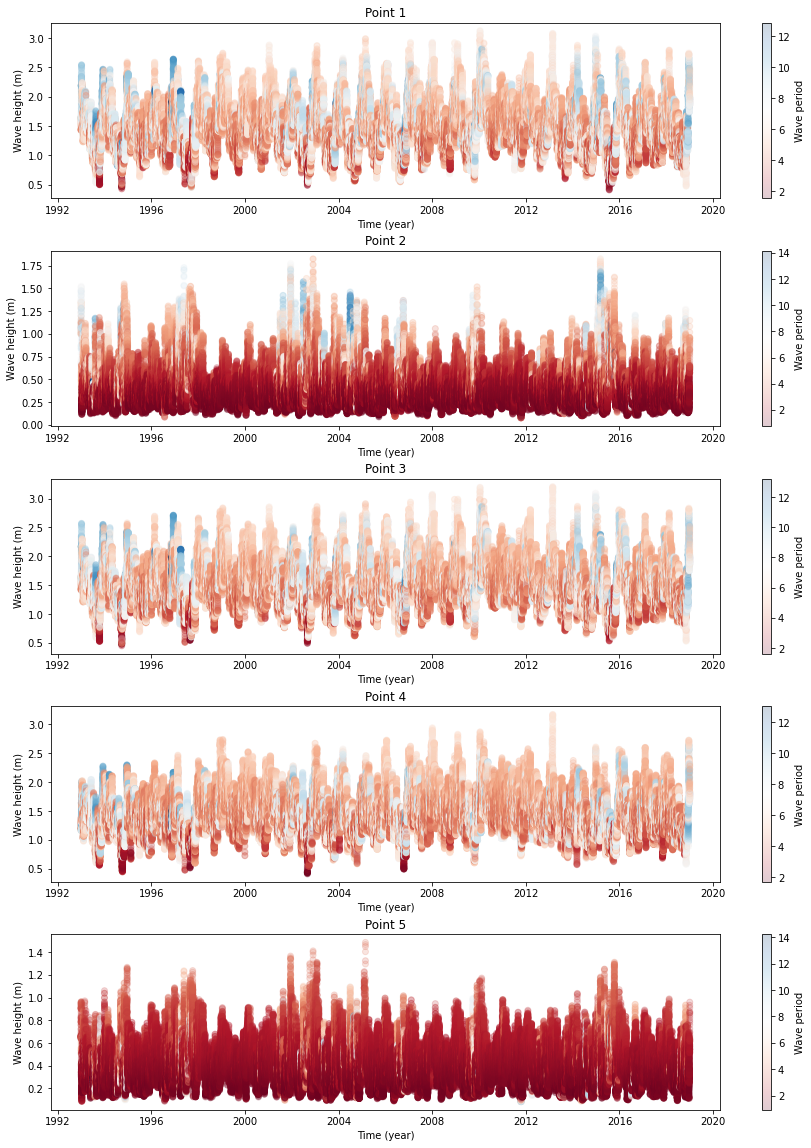

In [20]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.3)

ax1 = plt.subplot2grid((5,1),(0,0))
ax2 = plt.subplot2grid((5,1),(1,0))
ax3 = plt.subplot2grid((5,1),(2,0))
ax4 = plt.subplot2grid((5,1),(3,0))
ax5 = plt.subplot2grid((5,1),(4,0))

output_pt1 = ax1.scatter(wave_time_pt1,wave_height_pt1,c=wave_period_pt1,alpha=0.2,cmap='RdBu')
ax1.set_title('Point 1')

output_pt2 = ax2.scatter(wave_time_pt2,wave_height_pt2,c=wave_period_pt2,alpha=0.2,cmap='RdBu')
ax2.set_title('Point 2')

output_pt3 = ax3.scatter(wave_time_pt3,wave_height_pt3,c=wave_period_pt3,alpha=0.2,cmap='RdBu')
ax3.set_title('Point 3')

output_pt4 = ax4.scatter(wave_time_pt4,wave_height_pt4,c=wave_period_pt4,alpha=0.2,cmap='RdBu')
ax4.set_title('Point 4')

output_pt5 = ax5.scatter(wave_time_pt5,wave_height_pt5,c=wave_period_pt5,alpha=0.2,cmap='RdBu')
ax5.set_title('Point 5')

# max_wave_period = 8
# storm_wave_period = wave_period[wave_period>max_wave_period]
# storm_wave_height = wave_height[wave_period>max_wave_period]
# storm_time = wave_time[wave_period>max_wave_period]
# output = ax2.scatter(storm_time,storm_wave_height,c=storm_wave_period,alpha=0.2,cmap='RdBu')

for ax,output in zip([ax1,ax2,ax3,ax4,ax5],[output_pt1,output_pt2,output_pt3,output_pt4,output_pt5]):    
    ax.set_ylabel('Wave height (m)')
    ax.set_xlabel('Time (year)')
    plt.colorbar(output,ax=ax,label='Wave period')

plt.show()

In [21]:
start_year = 2002
end_year = 2004

wave_time_slice = np.array([time for time in wave_time if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])
wave_height_slice = np.array([height for height,time in zip(wave_height,wave_time)\
                     if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])
wave_period_slice = np.array([period for period,time in zip(wave_period,wave_time)\
                     if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])

fig = plt.figure(figsize=(15,20))

ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

ax1.scatter(wave_time_slice,wave_height_slice,c=wave_period_slice,alpha=0.2,cmap='RdBu')

max_wave_period = 7
storm_wave_period = wave_period_slice[wave_period_slice>max_wave_period]
storm_wave_height = wave_height_slice[wave_period_slice>max_wave_period]
storm_time = wave_time_slice[wave_period_slice>max_wave_period]


ax2.scatter(storm_time,storm_wave_height,c=storm_wave_period,alpha=0.2,cmap='RdBu')

plt.show()

NameError: name 'wave_time' is not defined

In [22]:
start_year = 2015
end_year = 2016

wave_time_slice = np.array([time for time in wave_time if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])
wave_height_slice = np.array([height for height,time in zip(wave_height,wave_time)\
                     if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])
wave_period_slice = np.array([period for period,time in zip(wave_period,wave_time)\
                     if ((time>datetime(start_year,1,1,0,0))&(time<datetime(end_year,1,1,0,0))) ])

fig = plt.figure(figsize=(15,20))

ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

ax1.scatter(wave_time_slice,wave_height_slice,c=wave_period_slice,alpha=0.2,cmap='RdBu')

max_wave_period = 7
storm_wave_period = wave_period_slice[wave_period_slice>max_wave_period]
storm_wave_height = wave_height_slice[wave_period_slice>max_wave_period]
storm_time = wave_time_slice[wave_period_slice>max_wave_period]


ax2.scatter(storm_time,storm_wave_height,c=storm_wave_period,alpha=0.2,cmap='RdBu')

ax1.set_title('Cylone Pam: March 2015')

plt.show()

NameError: name 'wave_time' is not defined

# Cyclones
- March 2015; cyclone Pam (6-20th)
- 



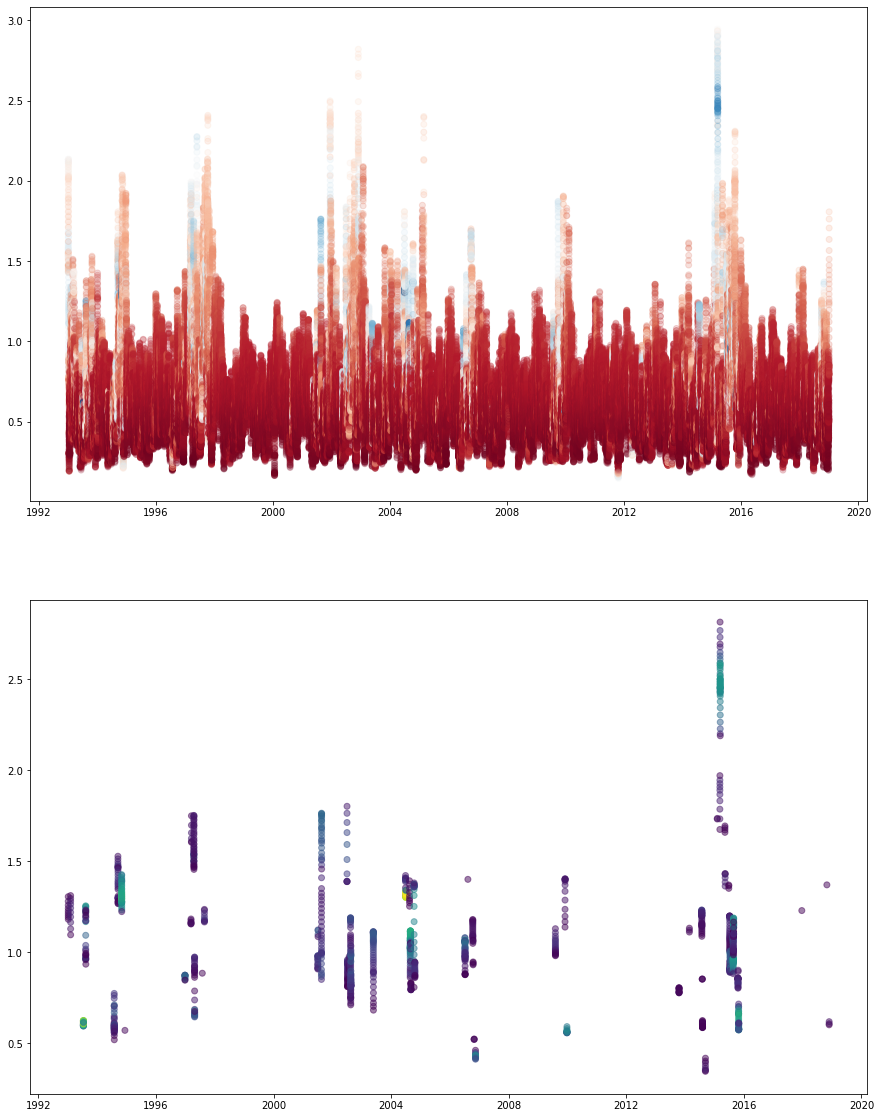

In [23]:
fig = plt.figure(figsize=(15,20))

ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0))

ax1.scatter(time_dict['time'],waves_dict['Hso'][:,0],c=waves_dict['Tmo'][:,0],alpha=0.2,cmap='RdBu')

max_wave_period = 8
storm_wave_period = waves_dict['Tmo'][:,0][waves_dict['Tmo'][:,0]>max_wave_period]
storm_wave_height = waves_dict['Hso'][:,0][waves_dict['Tmo'][:,0]>max_wave_period]
storm_time = np.array(waves_dict['Timeo'])[waves_dict['Tmo'][:,0]>max_wave_period]


ax2.scatter(storm_time,storm_wave_height,c=storm_wave_period,alpha=0.5)

plt.show()

# Autocorrelation

In [ ]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.stattools import durbin_watson

"""
Code for Durbin Watson test
"""




In [ ]:
df_lagoon_columns = list(df_lagoon)
df_lagoon_columns = [x for x in df_lagoon_columns if x not in ['time','lat','long']]

durban_dicts = {}

for key,group in df_lagoon.groupby(['lat','long']):
    
    group.sort_values('time',inplace=True)
    
    group_dict = {}
    
    for col in df_lagoon_columns:
        X =np.asarray(group['time'])
        Y = np.asarray(group[col])
        X = sm.add_constant(X)

        # Fit the ordinary least square method.
        ols_res = OLS(Y,X).fit()
        
        # apply durbin watson statistic on the ols residual, and add to dictionary
        group_dict.update({
            col:durbin_watson(ols_res.resid)
        })
    
    durban_dicts.update({
        key:group_dict
    })
    
# Combine results into a dataframe
df_durban_results = pd.DataFrame.from_dict(durban_dicts).T

# average all the results over the lat-longs

    

In [ ]:
[datetime.timestamp(x) for x in group['time']]

In [ ]:
# df_winds['wind_u'],df_winds['wind_v'],tide_dict['Tide'],